# What is image similarity anyway? 

In [11]:

DATA_URL = 'http://download.tensorflow.org/models/image/imagenet/inception-2015-12-05.tgz'
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [12]:
model_dir = './'
import os, sys, tarfile
import urllib.request
import numpy as np
import glob, tqdm
from matplotlib import pyplot as plt
from skimage import io

import tensorflow as tf


In [13]:
def maybe_download_and_extract():
    """Download and extract model tar file."""
    dest_directory = model_dir
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
          sys.stdout.write('\r>> Downloading %s %.1f%%' % (
              filename, float(count * block_size) / float(total_size) * 100.0))
          sys.stdout.flush()
        filepath, _ = urllib.request.urlretrieve(DATA_URL, filepath, _progress)
        print()
        statinfo = os.stat(filepath)
        print('Successfully downloaded', filename, statinfo.st_size, 'bytes.')
    tarfile.open(filepath, 'r:gz').extractall(dest_directory)

In [14]:
maybe_download_and_extract()

In [15]:

def create_graph():
    """Creates a graph from saved GraphDef file and returns a saver."""
    # Creates graph from saved graph_def.pb.
    with tf.gfile.FastGFile(os.path.join(model_dir, 'classify_image_graph_def.pb'), 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        _ = tf.import_graph_def(graph_def, name='')



In [16]:
def run_inference_on_image(image):
    """Runs inference on an image.

    Args:
    image: Image file name."""
    image_data = tf.gfile.FastGFile(image, 'rb').read()



    # Some useful tensors:
    # 'softmax:0': A tensor containing the normalized prediction across
    #   1000 labels.
    # 'pool_3:0': A tensor containing the next-to-last layer containing 2048
    #   float description of the image.
    # 'DecodeJpeg/contents:0': A tensor containing a string providing JPEG
    #   encoding of the image.
    # Runs the softmax tensor by feeding the image_data as input to the graph.
    softmax_tensor = sess.graph.get_tensor_by_name('pool_3:0')
    predictions = sess.run(softmax_tensor,
                           {'DecodeJpeg/contents:0': image_data})
    predictions = np.squeeze(predictions)

    return predictions

In [39]:
imfiles = glob.glob('/media/leonardo/DATA/WebGallery/netherlandish/*.jpg')[:1000]
print(len(imfiles))

664


In [40]:
predictions = []


config = tf.ConfigProto()
config.gpu_options.allow_growth=True

# Creates graph from saved GraphDef.
create_graph()

with tf.Session(config=config) as sess:
    for im in tqdm.tqdm(imfiles):
        predictions.append(run_inference_on_image(im))


100%|██████████| 664/664 [00:27<00:00, 24.98it/s]


In [41]:
predictions = np.asarray(predictions)

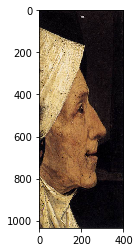

In [42]:
plt.imshow(io.imread(imfiles[3]))

In [43]:
from scipy import spatial as sp

In [44]:
Y = sp.distance.squareform(sp.distance.pdist(predictions))

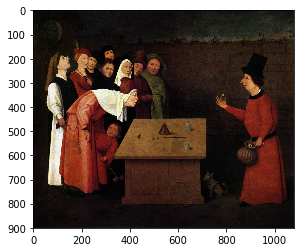

In [58]:
query_index = 12
plt.imshow(io.imread(imfiles[query_index]))

In [59]:
# np.argsort(Y[query_index,:])

Text(0.5,0.98,'Closest 5 images')

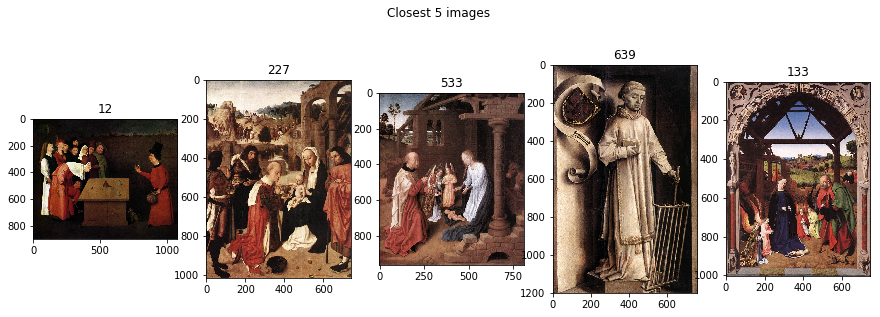

In [60]:
plt.figure(figsize=(15,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    idx = np.argsort(Y[query_index,:])[i]
    plt.imshow(io.imread(imfiles[idx]))
    plt.title(str(idx))
plt.suptitle('Closest 5 images')

Text(0.5,0.98,'Furthest 5 images')

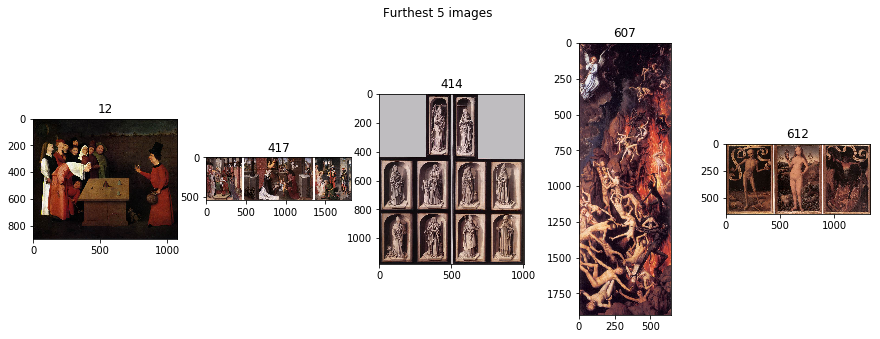

In [61]:
plt.figure(figsize=(15,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    idx = np.argsort(Y[query_index,:])[-i]
    plt.imshow(io.imread(imfiles[idx]))
    plt.title(str(idx))
plt.suptitle('Furthest 5 images')

In [49]:
imagelist = []
for idx in np.argsort(Y[query_index,:]):
    tmpim = io.imread(imfiles[idx])
    imagelist.append(tmpim)

In [50]:
# import imageio
# imageio.mimsave('./movie.gif', imagelist)

In [51]:
def get_image_style(image):

    image_data = tf.gfile.FastGFile(image, 'rb').read()


    softmax_tensor = sess.graph.get_tensor_by_name('conv_3:0')
    predictions = sess.run(softmax_tensor,
                           {'DecodeJpeg/contents:0': image_data})
    predictions = np.squeeze(predictions)

    return predictions

In [52]:
styles = []
create_graph()
with tf.Session(config=config) as sess:
    for im in tqdm.tqdm(imfiles):
        styles.append(get_image_style(im))
styles = np.asarray(styles)    

100%|██████████| 664/664 [00:09<00:00, 65.51it/s]


In [53]:
styles = styles.reshape(styles.shape[0], -1)

In [54]:
Y_style = sp.distance.squareform(sp.distance.pdist(styles))

Text(0.5,0.98,'Closest 5 images')

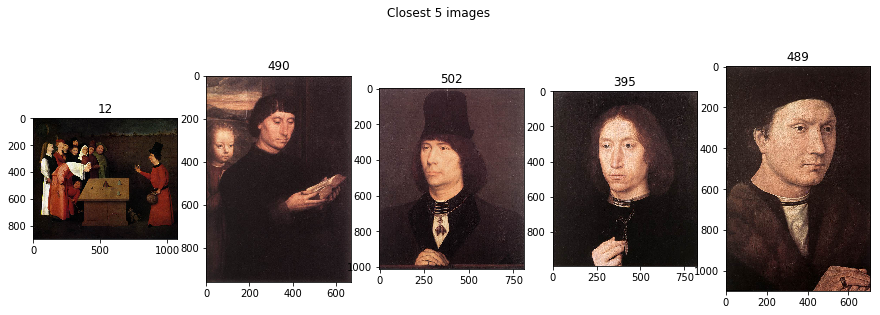

In [62]:
plt.figure(figsize=(15,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    idx = np.argsort(Y_style[query_index,:])[i]
    plt.imshow(io.imread(imfiles[idx]))
    plt.title(str(idx))
plt.suptitle('Closest 5 images')

Text(0.5,0.98,'Furthest 5 images')

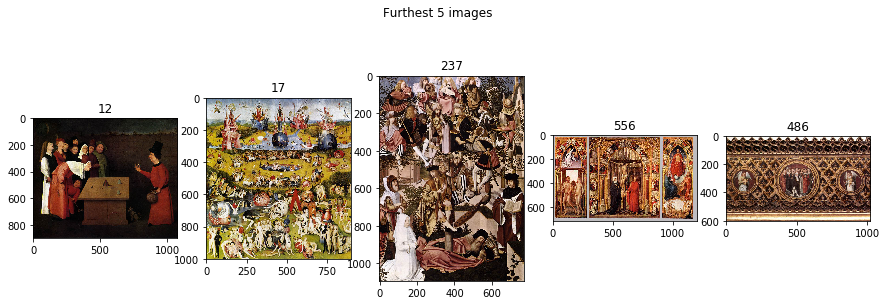

In [63]:
plt.figure(figsize=(15,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    idx = np.argsort(Y_style[query_index,:])[-i]
    plt.imshow(io.imread(imfiles[idx]))
    plt.title(str(idx))
plt.suptitle('Furthest 5 images')